In [21]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import pathlib
# For reproducibility
np.random.seed(42)

from keras_preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils, losses
from tensorflow.keras.datasets import mnist

In [3]:
data_dir_train = pathlib.Path('./data/hotdog-nothotdog/train/')
data_dir_test = pathlib.Path('./data/hotdog-nothotdog/test/')

In [4]:
#image_count = len(list(data_dir.glob('*.jpg')))

In [5]:
train_datagen = ImageDataGenerator(rescale=1. / 255, vertical_flip= True, horizontal_flip=True, rotation_range= 0.3, zoom_range=(-0.05, -0.15))

itr_train = train_datagen.flow_from_directory(data_dir_train, target_size=(299, 299), batch_size = 3000, class_mode='categorical')
X_train, y_train = itr_train.next()

Found 3000 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1. / 255, vertical_flip= True, horizontal_flip=True, rotation_range= 0.3, zoom_range=(-0.05, -0.15))
itr_test = test_datagen.flow_from_directory(data_dir_test, target_size=(299, 299), batch_size = 1481, class_mode='categorical')
X_test, y_test = itr_test.next()

Found 644 images belonging to 2 classes.


In [7]:
X_train.shape

(3000, 299, 299, 3)

In [8]:
X_test.shape

(644, 299, 299, 3)

In [9]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(3,3),activation="relu",input_shape=(299,299,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(16,kernel_size=(3,3),activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())

cnn_model.add(Dense(128,activation="relu"))
cnn_model.add(Dense(64,activation="relu"))
cnn_model.add(Dense(128,activation="relu"))
cnn_model.add(Dense(32,activation="relu"))

cnn_model.add(Dense(2,activation="sigmoid"))
cnn_model.compile(loss=losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

history_cnn=cnn_model.fit(X_train,y_train,batch_size=256,validation_data=(X_test,y_test),epochs=10,verbose=1)

2022-10-21 14:56:00.605474: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-21 14:56:00.605855: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Epoch 1/10


2022-10-21 14:56:01.297515: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-21 14:56:01.573419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 0.9902 - accuracy: 0.5057

2022-10-21 14:56:12.608279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 13s 704ms/step - loss: 0.9902 - accuracy: 0.5057 - val_loss: 1.1956 - val_accuracy: 0.5016
Epoch 2/10
12/12 [==============================] - 7s 579ms/step - loss: 0.8097 - accuracy: 0.4960 - val_loss: 0.7169 - val_accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - 7s 568ms/step - loss: 0.6865 - accuracy: 0.5447 - val_loss: 0.6745 - val_accuracy: 0.5932
Epoch 4/10
12/12 [==============================] - 7s 558ms/step - loss: 0.6631 - accuracy: 0.6057 - val_loss: 0.6643 - val_accuracy: 0.6351
Epoch 5/10
12/12 [==============================] - 7s 558ms/step - loss: 0.6611 - accuracy: 0.6037 - val_loss: 0.6834 - val_accuracy: 0.5870
Epoch 6/10
12/12 [==============================] - 6s 537ms/step - loss: 0.6536 - accuracy: 0.6333 - val_loss: 0.6621 - val_accuracy: 0.6180
Epoch 7/10
12/12 [==============================] - 7s 561ms/step - loss: 0.6324 - accuracy: 0.6557 - val_loss: 0.6681 - val_accuracy: 0.6553
Epoch 8/10
12/12

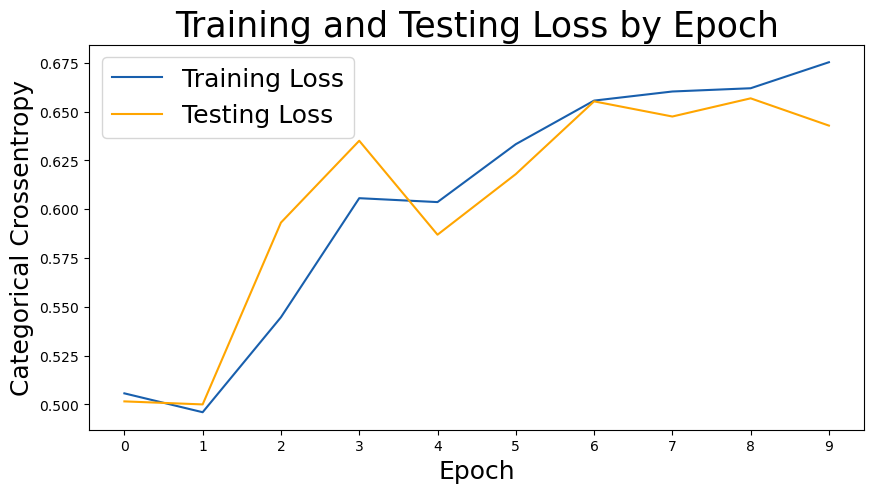

In [11]:
# Check out our train loss and test loss over epochs.
train_loss = history_cnn.history['accuracy']
test_loss = history_cnn.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(10, 5))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

In [12]:
history_cnn.history['accuracy'][-1], history_cnn.history['val_accuracy'][-1]

(0.6753333210945129, 0.6428571343421936)

In [13]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(3,3),activation="relu",input_shape=(299,299,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(16,kernel_size=(3,3),activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())

cnn_model.add(Dense(128,activation="relu"))
cnn_model.add(Dense(64,activation="relu"))
cnn_model.add(Dense(128,activation="relu"))
cnn_model.add(Dense(32,activation="relu"))

cnn_model.add(Dense(2,activation="sigmoid"))
cnn_model.compile(loss=losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

history_cnn=cnn_model.fit(X_train,y_train,batch_size=256,validation_data=(X_test,y_test),epochs=10,verbose=1)

Epoch 1/10


2022-10-21 14:58:04.427855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 0.7774 - accuracy: 0.5403

2022-10-21 14:58:12.369905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 10s 777ms/step - loss: 0.7774 - accuracy: 0.5403 - val_loss: 0.6882 - val_accuracy: 0.5668
Epoch 2/10
12/12 [==============================] - 7s 589ms/step - loss: 0.6762 - accuracy: 0.6023 - val_loss: 0.6731 - val_accuracy: 0.5963
Epoch 3/10
12/12 [==============================] - 6s 498ms/step - loss: 0.6644 - accuracy: 0.6247 - val_loss: 0.6704 - val_accuracy: 0.6180
Epoch 4/10
12/12 [==============================] - 5s 419ms/step - loss: 0.6492 - accuracy: 0.6390 - val_loss: 0.6629 - val_accuracy: 0.6165
Epoch 5/10
12/12 [==============================] - 4s 376ms/step - loss: 0.6430 - accuracy: 0.6330 - val_loss: 0.6668 - val_accuracy: 0.6149
Epoch 6/10
12/12 [==============================] - 5s 423ms/step - loss: 0.6310 - accuracy: 0.6447 - val_loss: 0.6572 - val_accuracy: 0.6351
Epoch 7/10
12/12 [==============================] - 5s 376ms/step - loss: 0.6212 - accuracy: 0.6633 - val_loss: 0.6683 - val_accuracy: 0.6289
Epoch 8/10
12/12

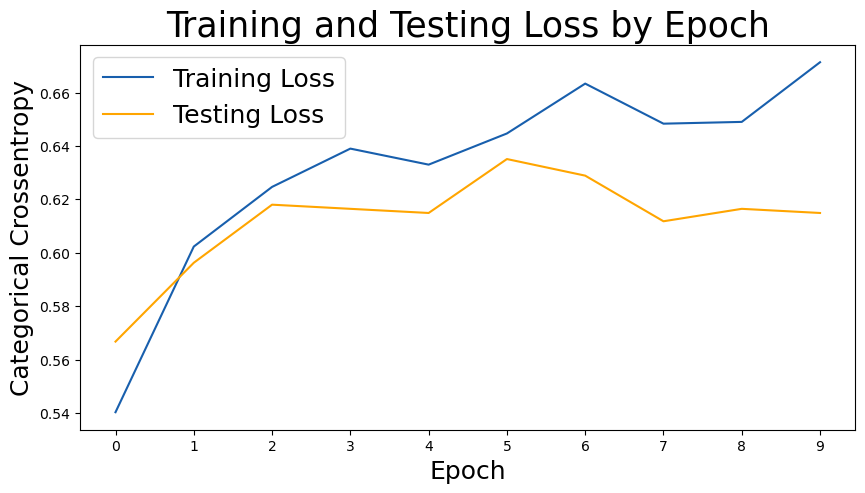

In [14]:
# Check out our train loss and test loss over epochs.
train_loss = history_cnn.history['accuracy']
test_loss = history_cnn.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(10, 5))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

In [22]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [6]:
pretrained_model = InceptionV3(input_shape = (299,299,3),
                              include_top = False,
                              weights = 'imagenet')

Metal device set to: Apple M1 Pro


2022-10-21 14:35:38.867438: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-21 14:35:38.867609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
x= layers.Flatten()(pretrained_model.output)

x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense (1, activation = 'sigmoid')(x)

model = Model(pretrained_model.input, x)

model.compile(optimizer = RMSprop(learning_rate = 0.0001), loss = losses.CategoricalCrossentropy(), metrics = ['acc'])

In [8]:
train_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=True, rotation_range= 40, zoom_range = 0.2)

itr_train = train_datagen.flow_from_directory(data_dir_train, target_size=(299, 299), batch_size = 3000, class_mode='categorical')
#X_train, y_train = itr_train.next()

test_datagen = ImageDataGenerator(rescale=1. / 255,  horizontal_flip=True, rotation_range= 40, zoom_range= 0.2)
itr_test = test_datagen.flow_from_directory(data_dir_test, target_size=(299, 299), batch_size = 1481, class_mode='categorical')
#X_test, y_test = itr_test.next()

Found 3000 images belonging to 2 classes.
Found 644 images belonging to 2 classes.


In [ ]:
history = model.fit(itr_train, batch_size=20, validation_data=itr_test, epochs=5, verbose=1)

Epoch 1/5


2022-10-21 14:36:13.029219: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-21 14:36:17.220745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [15]:
batch_size = 16
nb_classes = 4
nb_epochs = 5
img_rows, img_columns = 200, 200
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = tf.nn.relu, input_shape = (200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(1, activation = tf.nn.softmax)
])

In [24]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [26]:
model.fit(X_train,y_train,batch_size=256,validation_data=(X_test,y_test),epochs=10,verbose=1)

Epoch 1/10


ValueError: in user code:

    File "/Users/nina/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/nina/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/nina/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/nina/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Users/nina/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/nina/opt/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 200, 200, 3), found shape=(None, 299, 299, 3)
